# AS4501 Astroinformática - Tarea 1

## How much rain is too much

---

### Estudiante: Andrés Calderón

Librerías a utilizar:

In [ ]:
%pip install numpy pandas matplotlib

#### Pregunta Q1.1

Importamos los dataframes:

In [106]:
import pandas as pd

hr_colorado = pd.read_csv("data/330077_HR.csv")
hr_serena = pd.read_csv("data/290004_HR.csv")
hr_calama = pd.read_csv("data/220002_HR.csv")
hr_tobalaba = pd.read_csv("data/330019_HR.csv")

Graficamos la función de densidad de probabilidad para cada zona

- Primero creamos la función de Gauss a graficar:

In [107]:
import numpy as np

def gauss(x, *p):
    A, mu, sigma = p
    return A * np.exp(-(x-mu)**2 / (2.*sigma**2))

- Luego definimos una función para obtener los valores de A, $\mu$ y $\sigma$ usando los datos disponibles, para después graficarlos:

In [142]:
from matplotlib import pyplot as plt
%matplotlib inline

def getParams(df, data):
    mu = df[data].mean()
    sigma = df[data].std()
    A = 1 / (sigma * (2 * np.pi)**(.5))
    return (A, mu, sigma)

def plot_pdf(df, name, data, upper=100, desc="", bins=50):
    x = np.linspace(0, upper, 100)
    A, mu, sigma = getParams(df, data)

    plt.figure(figsize=(6,4))

    plt.hist(df[data], bins=bins, edgecolor="black", density=True)
    plt.plot(x, gauss(x, A, mu, sigma), color='red', label=f"Gauss with parameters $\mu$: {round(mu, 2)} / $\sigma$: {round(sigma, 2)}")
    plt.title(f"Distribution of the {desc}{data} in {name}")
    plt.legend()
    plt.xlabel(f"{data}")
    plt.ylabel("Frequency")

    plt.show()

- Finalmente graficamos la distribución de HR para las distintas estaciones junto al histograma para ver que tanto se asemeja la caracterización que realizamos:

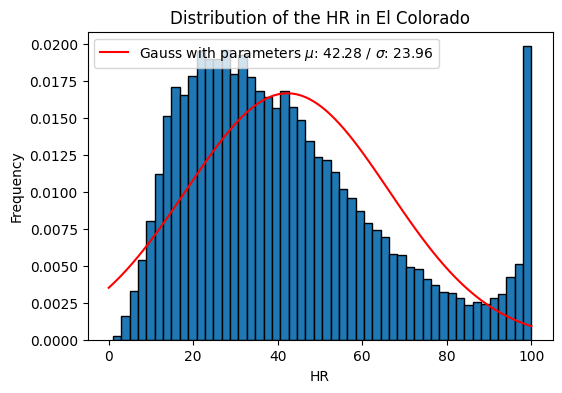

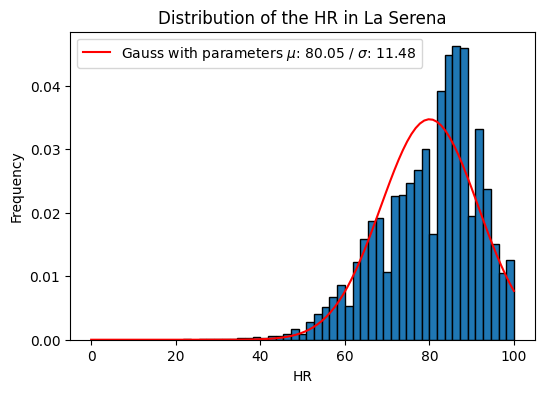

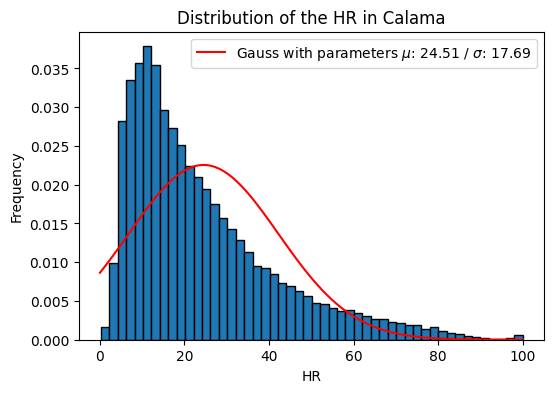

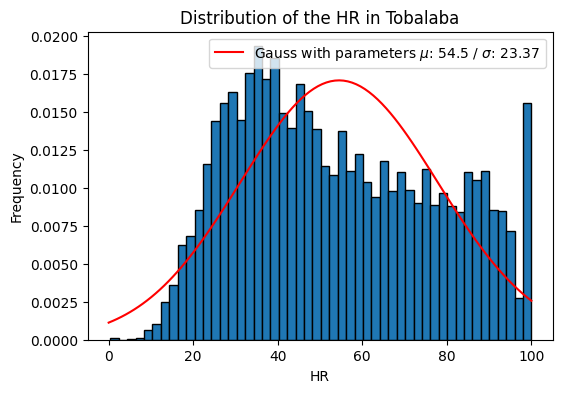

In [143]:
plot_pdf(hr_colorado, "El Colorado", "HR")
plot_pdf(hr_serena, "La Serena", "HR")
plot_pdf(hr_calama, "Calama", "HR")
plot_pdf(hr_tobalaba, "Tobalaba", "HR")

#### Pregunta Q1.2

Usaremos los datos disponibles en la estación de Quinta Normal desde 2012 hasta la fecha y los graficaremos:

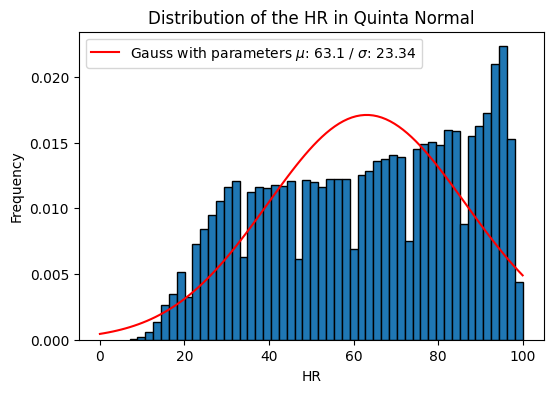

In [144]:
hr_quinta_normal = pd.read_csv("data/330020_HR.csv")

plot_pdf(hr_quinta_normal, "Quinta Normal", "HR")

Al ojo podemos notar que la distribución más similar a esta es la de Tobalaba, pero utilizaremos la distancia de Bhattacharyya, pues esta es una medida que calcula la distancia entre dos distribuciones de probabilidad:

In [155]:
quinta_normal_params = getParams(hr_quinta_normal, "HR")
colorado_params = getParams(hr_colorado, "HR")
tobalada_params = getParams(hr_tobalaba, "HR")
calama_params = getParams(hr_calama, "HR")
serena_params = getParams(hr_serena, "HR")

x = np.linspace(0, 100, 100)

Db_colorado = -np.log(sum([np.sqrt(gauss(i, *quinta_normal_params) * gauss(i, *colorado_params)) for i in x]))
Db_tobalaba = -np.log(sum([np.sqrt(gauss(i, *quinta_normal_params) * gauss(i, *tobalada_params)) for i in x]))
Db_calama = -np.log(sum([np.sqrt(gauss(i, *quinta_normal_params) * gauss(i, *calama_params)) for i in x]))
Db_serena = -np.log(sum([np.sqrt(gauss(i, *quinta_normal_params) * gauss(i, *serena_params)) for i in x]))
print(f"Distancia de Bhattacharyya de Quinta Normal respecto a:")
print(f"- El Colorado: {Db_colorado}")
print(f"- Tobalaba: {Db_tobalaba}")
print(f"- Calama: {Db_calama}")
print(f"- La Serena: {Db_serena}")

Distancia de Bhattacharyya de Quinta Normal respecto a:
- El Colorado: 0.14170564379685394
- Tobalaba: 0.0705363875470921
- Calama: 0.4893058883132434
- La Serena: 0.28551780479812533


De estos resultados dado que la distancia de la distribucion de Quinta Normal y Tobalaba es la menor podemos decir que efectivamente esta es la distribución que es más cercana respecto a las demás, lo cual tiene sentido pues estos lugares estan bastante cerca a diferencia del resto.


#### Pregunta Q2.1

Primero importamos los datos que se nos piden (para este caso se eligió la estación de Quinta Normal nuevamente dado que estas lluvias afectaron principalmente a la zona centro del país), y luego mostramos información estadística relevante sobre este suceso para cada año:

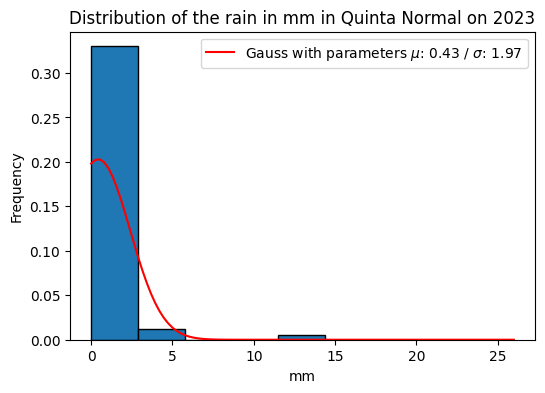

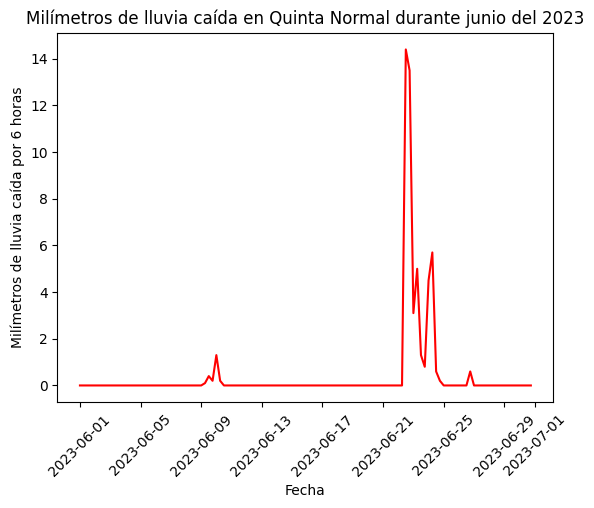

In [224]:
rain_2023 = pd.read_csv("data/mm_june_2023.csv")

plot_pdf(rain_2023, "Quinta Normal on 2023", "mm", 26, "rain in ", 5)
rain_2023.describe()

rain_2023["DateTime"] = pd.to_datetime(rain_2023["date"].astype(str) + rain_2023["time"].astype(str), format="%d/%m/%Y%H:%M")
plt.plot(rain_2023["DateTime"], rain_2023["mm"], color="red")
plt.xticks(rotation=45)
plt.xlabel("Fecha")
plt.ylabel("Milímetros de lluvia caída por 6 horas")
plt.title("Milímetros de lluvia caída en Quinta Normal durante junio del 2023")
plt.show()

Con esto se puede evidenciar el alza en las lluvias que hubieron durante este periodo

#### Pregunta Q2.2

Y ahora graficamos las distribuciones de lluvias ocurridas en esta estación durante junio de los últimos 5 años:

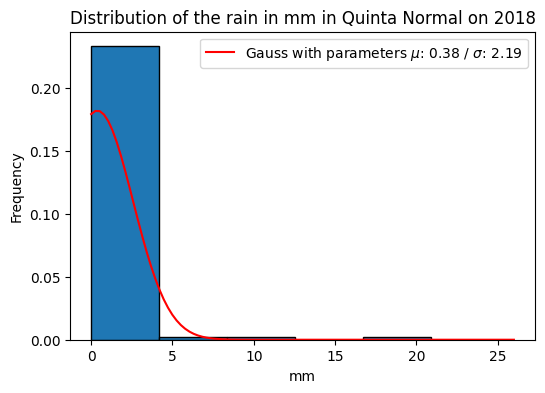

,mm
count,120.000000
mean,0.381667
std,2.190046
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,20.900000


In [147]:
rain_2018 = pd.read_csv("data/mm_june_2018.csv")
plot_pdf(rain_2018, "Quinta Normal on 2018", "mm", 26, "rain in ", 5)
rain_2018.describe()

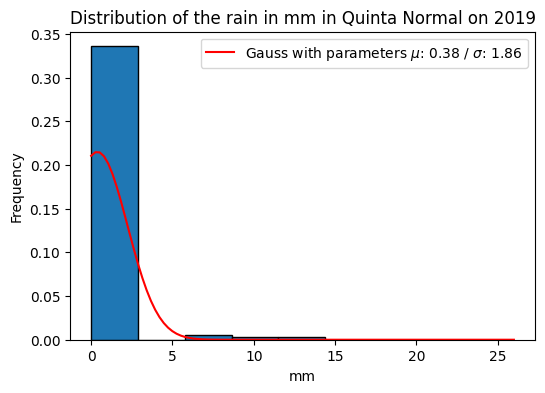

,mm
count,120.000000
mean,0.382500
std,1.855478
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,14.400000


In [157]:
rain_2019 = pd.read_csv("data/mm_june_2019.csv")
plot_pdf(rain_2019, "Quinta Normal on 2019", "mm", 26, "rain in ", 5)
rain_2019.describe()

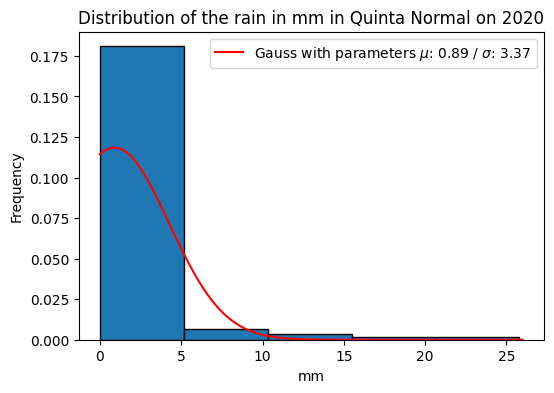

,mm
count,120.000000
mean,0.889167
std,3.367437
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,25.800000


In [149]:
rain_2020 = pd.read_csv("data/mm_june_2020.csv")
plot_pdf(rain_2020, "Quinta Normal on 2020", "mm", 26, "rain in ", 5)
rain_2020.describe()

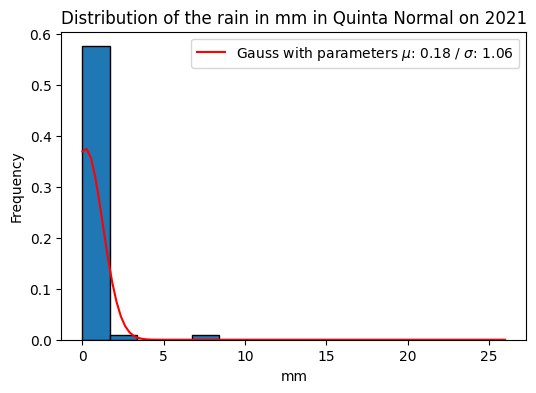

,mm
count,120.000000
mean,0.185000
std,1.063264
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.400000


In [150]:
rain_2021 = pd.read_csv("data/mm_june_2021.csv")
plot_pdf(rain_2021, "Quinta Normal on 2021", "mm", 26, "rain in ", 5)
rain_2021.describe()

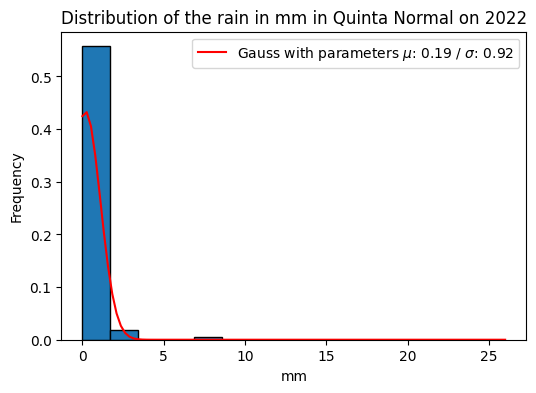

,mm
count,120.000000
mean,0.188333
std,0.919918
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.600000


In [151]:
rain_2022 = pd.read_csv("data/mm_june_2022.csv")
plot_pdf(rain_2022, "Quinta Normal on 2022", "mm", 26, "rain in ", 5)
rain_2022.describe()

Para medir la desviación utilizaremos el método de Z-score el cual nos sirve para calcular que tan desviado esta un dato particular en una muestra de datos, para ello usaremos la suma de milímetros de agua caída en junio por año desde 2018 como nuestra muestra de datos, es decir:

In [152]:
rains = [rain_2018, rain_2019, rain_2020, rain_2021, rain_2022, rain_2023]
mm = [rain["mm"].sum() for rain in rains]
print(mm)

[45.8, 45.900000000000006, 106.70000000000002, 22.2, 22.6, 51.9]


Con esta muestra calcularemos el Z-score para medir que tan desviado estuvieron los datos de milímetros de lluvia caída durante junio de este año respecto al mismo mes en años previos:

In [153]:
mu = np.mean(mm)
sigma = np.std(mm)
z = (mm[-1] - mu) / sigma
print(z)

0.09632451068576069


Este valor es cercano a 0 sigmas por lo que indica que es uno poco desviado de lo normal, al menos considerando la muestra representativa que se eligió.